# <a id='section1'></a>Superstore Sales Analysis

## <a id='section1-1'></a>Project Overview

This notebook presents an end to end analysis of the Superstore Sales Dataset, demonstrating the full data analytics workflow from data loading and cleaning to exploratory analysis and business insights generation.
The goal is to uncover patterns in sales performance, profitability, and customer behavior across different segments and regions.

### <a id='section1-2'></a>Tools & Libraries Used

**pandas** – for data manipulation and aggregation

**numpy** – for numerical computations

**matplotlib & seaborn** – for static data visualization

**plotly** – for interactive and dynamic charts

**datetime** – for handling and transforming date fields


## <a id='section2'></a>Data Loading and Initial Exploration

In this section, we import essential Python libraries and load the dataset into a pandas DataFrame.
The dataset is parsed with proper date formats for Order Date and Ship Date to enable time series analysis.

After loading, we conduct an initial inspection using methods such as:

`df.shape` – to understand dataset size

`df.dtypes` – to confirm data types

`df.head()` – to preview sample records

`df.isnull().sum()` – to check for missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
import datetime as dt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from operator import attrgetter
from IPython.display import display, HTML


# additional plotting settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)


warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load the dataset
df = pd.read_csv("/path/to/your/Superstore.csv", 
                 parse_dates=['Order Date', 'Ship Date'],
                 encoding='latin1')


#### **DataFrame Inspection & Validation**

Before proceeding with the analysis, we perform an initial validation of the dataset to ensure it is correctly loaded and structured.
The following code block checks key aspects of the DataFrame including its shape, column data types, sample records, and any missing values.

In [3]:
try:
    display(df.shape)
    display(df.dtypes)
    display(df.head(5))
    display(df.isnull().sum())
except Exception as e:
    print('Dataframe not loaded yet or empty. Replace the loading cell with your dataset path.')


(9994, 21)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Data Cleaning and Preparation

Data cleaning ensures that the dataset is consistent, complete, and correctly formatted for analysis.
This process includes column standardization, missing value treatment, duplicate removal, and data type corrections.

**Standardizing Column Names**

Column names are normalized by converting to lowercase, removing spaces, and replacing them with underscores.
This enhances readability and consistency when performing pandas operations.

`Code techniques used: str.strip(), str.lower(), and str.replace()`

In [4]:
# STANDARDIZE COLUMN NAMES
print("\n STANDARDIZING COLUMN NAMES:")
print("Original column names:")
print(df.columns.tolist())

# Clean up column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

print("\nStandardized column names:")
print(df.columns.tolist())



 STANDARDIZING COLUMN NAMES:
Original column names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Standardized column names:
['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


# Handling Missing Values

We identify and handle missing data using df.isnull().sum() to summarize gaps.
Appropriate techniques are applied, such as filling numerical columns (e.g., sales, profit, discount) with median or zero values to maintain data balance.


`Addressing missing values prevents biases and ensures accurate aggregation during descriptive and inferential analysis.`


In [5]:
# Check for missing values
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

# Optionally fill or drop depending on the column context
df['discount'].fillna(0, inplace=True)
df['profit'].fillna(df['profit'].median(), inplace=True)
df['sales'].fillna(df['sales'].median(), inplace=True)

# Drop rows where essential dates are missing
df.dropna(subset=['order_date', 'ship_date'], inplace=True)

print("\n Missing values handled appropriately.")


Series([], dtype: int64)

 Missing values handled appropriately.


# Removing Duplicates

Duplicate rows can misrepresent performance metrics.
We identify and remove duplicates using df.drop_duplicates(), tracking the number of records affected before and after cleaning.


`This ensures all records are unique, improving the reliability of insights drawn from aggregation and grouping.`

In [6]:
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)

print(f" Removed {before - after} duplicate records.")


 Removed 0 duplicate records.


# Processing Date Columns

We convert all date columns (order_date, ship_date) into proper datetime format using pd.to_datetime().
`This enables accurate time based computations and trend analysis over months and years.`

In [7]:
# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

print(f"Order Date range: {df['order_date'].min()} → {df['order_date'].max()}")
print(f"Ship Date range: {df['ship_date'].min()} → {df['ship_date'].max()}")

print("\n Date columns converted to datetime format.")


Order Date range: 2014-01-03 00:00:00 → 2017-12-30 00:00:00
Ship Date range: 2014-01-07 00:00:00 → 2018-01-05 00:00:00

 Date columns converted to datetime format.


# Processing Numeric Columns

Numeric columns such as sales, profit, discount, and quantity are cleaned using pd.to_numeric() to ensure compatibility with mathematical and visualization functions.


`Ensuring correct data types allows precise use of operations such as groupby(), aggregation, and statistical calculations.`

In [8]:
# Convert and clean numeric data
numeric_cols = ['sales', 'profit', 'discount', 'quantity']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle invalid or missing values
df['discount'].fillna(0, inplace=True)
df['sales'].fillna(df['sales'].median(), inplace=True)
df['profit'].fillna(df['profit'].median(), inplace=True)
df['quantity'].fillna(0, inplace=True)
df['quantity'] = df['quantity'].astype(int)

print(" Numeric columns cleaned and standardized.")


 Numeric columns cleaned and standardized.


# Checking for Data Inconsistencies

We’ll perform a quick quality check for anomalies such as negative sales, extreme values, or unrealistic discounts.

In [9]:
# Negative or zero sales
neg_sales = df[df['sales'] <= 0]
print(f"Records with negative/zero sales: {len(neg_sales)}")

# Outliers in sales
q99_sales = df['sales'].quantile(0.99)
outliers = df[df['sales'] > q99_sales]
print(f"Extreme sales values (top 1%): {len(outliers)}")

# Invalid discounts
invalid_discounts = df[df['discount'] > 1]
print(f"Invalid discounts (>100%): {len(invalid_discounts)}")


Records with negative/zero sales: 0
Extreme sales values (top 1%): 100
Invalid discounts (>100%): 0


# Feature Engineering

We’ll now add new analytical features to enrich our dataset for deeper insights.

In [10]:
# Time-based
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['quarter'] = df['order_date'].dt.quarter
df['day_of_week'] = df['order_date'].dt.day_name()
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)

# Business metrics
df['profit_margin'] = np.where(df['sales'] != 0, df['profit'] / df['sales'], 0)
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

print("New analytical features created:")
print("   - Year, Month, Quarter, Day of Week, Order Month")
print("   - Profit Margin, Shipping Days")

print("\nUpdated dataset info:")
print(df.info())


New analytical features created:
   - Year, Month, Quarter, Day of Week, Order Month
   - Profit Margin, Shipping Days

Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   o

#### Summary of Data Cleaning & Preparation

| Process                     | Objective                        | Result                       |
| --------------------------- | -------------------------------- | ---------------------------- |
| Column Name Standardization | Make naming consistent           | Clean, lowercase headers   |
| Missing Value Handling      | Fill or drop nulls appropriately | No critical gaps           |
| Duplicate Removal           | Prevent double counting          | Clean unique records       |
| Date Conversion             | Enable time analysis             | Proper datetime format     |
| Numeric Processing          | Ensure valid numeric operations  | Clean numeric fields       |
| Consistency Checks          | Detect and flag anomalies        | Quality issues identified  |
| Feature Engineering         | Add analytical depth             | New business/time features |


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis provides a visual and statistical understanding of the dataset.
In this stage, we summarize the key numerical features, explore relationships, and visualize patterns that drive profitability.

#### Descriptive Statistics

Using df.describe() and visual plots, we observe measures like mean, median, and standard deviation across numerical variables.


`This gives a quantitative overview of the dataset distribution and highlights potential outliers in sales or profit.`

In [11]:
# Numerical columns statistics 
print("\n NUMERICAL COLUMNS STATISTICS\n")

numerical_cols = ['sales', 'profit', 'quantity', 'discount', 'profit_margin', 'shipping_days']

# Generate descriptive statistics
desc_stats = df[numerical_cols].describe().T
desc_stats['IQR'] = desc_stats['75%'] - desc_stats['25%']  # Interquartile Range
desc_stats['CV'] = (desc_stats['std'] / desc_stats['mean']).round(2)  # Coefficient of Variation

display(desc_stats.style.background_gradient(cmap='Blues').format(precision=2))



 NUMERICAL COLUMNS STATISTICS



,count,mean,std,min,25%,50%,75%,max,IQR,CV
sales,9994.00,229.86,623.25,0.44,17.28,54.49,209.94,22638.48,192.66,2.71
profit,9994.00,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98,27.64,8.17
quantity,9994.00,3.79,2.23,1.00,2.00,3.00,5.00,14.00,3.00,0.59
discount,9994.00,0.16,0.21,0.00,0.00,0.20,0.20,0.80,0.20,1.32
profit_margin,9994.00,0.12,0.47,-2.75,0.07,0.27,0.36,0.50,0.29,3.88
shipping_days,9994.00,3.96,1.75,0.00,3.00,4.00,5.00,7.00,2.00,0.44


### **Key Takeaways from Numerical Columns Statistics:**

**Sales:**
The average sales value is approximately **229.86**, but with a **high standard deviation (623.25)**, indicating a large variability across transactions. The **maximum sales (22,638.48)** shows that a few very high-value sales significantly influence the dataset. The **coefficient of variation (2.71)** further confirms high inconsistency in sales amounts, suggesting that while most sales are small, some outliers drive total revenue.

**Profit:**
Profits have an **average of 28.66** but display a very **high standard deviation (234.26)** and a **wide range** from **-6,599.98 to 8,399.98**, indicating substantial variation in business performance per order. The **negative profit values** suggest that some transactions resulted in losses. The **CV of 8.17** highlights high profit volatility, calling for a deeper look into loss-making categories or discount-heavy transactions.

**Quantity:**
Orders typically consist of **3 to 5 items**, with a **mean of 3.79** and **moderate variability (CV = 0.59)**. This suggests relatively stable order quantities, reflecting consistent customer buying patterns.

**Discount:**
The **average discount is 16%**, with most discounts clustering around **0.20 (20%)**, though some reach **80%**. The **CV of 1.32** implies high fluctuation in discounting policies, which may affect profitability. This indicates a potential need for reviewing discount thresholds to balance competitiveness and margin control.

**Profit Margin:**
The **mean profit margin (0.12)** with a **wide spread (std = 0.47)** and **high CV (3.88)** reflects inconsistency in profitability across transactions. Some records even have **negative margins**, emphasizing that not all sales contribute positively to profit. This could be influenced by discounting, high costs, or unprofitable product categories.

**Shipping Days:**
The average shipping duration is around **4 days**, with most orders delivered within **3 to 5 days**. The **low variability (CV = 0.44)** suggests a reliable logistics performance. However, the **minimum of 0 days** could indicate same-day deliveries or data entry errors worth investigating.



#### **Categorical Columns Summary**

Next, we’ll explore key categorical variables such as region, segment, and category.
Understanding how data is distributed across categories gives a sense of customer diversity and business coverage.

In [12]:
print("\n CATEGORICAL COLUMNS STATISTICS\n")

categorical_cols = ['ship_mode', 'segment', 'region', 'category', 'sub-category', 'city', 'state']

for col in categorical_cols:
    print(f"\n{col.upper()}")
    print("-" * len(col))
    print(f"• Unique values: {df[col].nunique()}")
    
    mode_value = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
    print(f"• Most frequent: {mode_value}")
    
    # Show value counts only if categories are limited (for better readability)
    if df[col].nunique() <= 15:
        print("\nTop categories:")
        display(df[col].value_counts().head(10).to_frame('Count'))



 CATEGORICAL COLUMNS STATISTICS


SHIP_MODE
---------
• Unique values: 4
• Most frequent: Standard Class

Top categories:


,Count
ship_mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543



SEGMENT
-------
• Unique values: 3
• Most frequent: Consumer

Top categories:


,Count
segment,
Consumer,5191
Corporate,3020
Home Office,1783



REGION
------
• Unique values: 4
• Most frequent: West

Top categories:


,Count
region,
West,3203
East,2848
Central,2323
South,1620



CATEGORY
--------
• Unique values: 3
• Most frequent: Office Supplies

Top categories:


,Count
category,
Office Supplies,6026
Furniture,2121
Technology,1847



SUB-CATEGORY
------------
• Unique values: 17
• Most frequent: Binders

CITY
----
• Unique values: 531
• Most frequent: New York City

STATE
-----
• Unique values: 49
• Most frequent: California


### **Key Takeaways from Categorical Columns Statistics:**

**Ship Mode:**
There are **four shipping options**, with **Standard Class** being the most frequently used (≈60% of total orders). This suggests that customers tend to prioritize **cost-efficiency over delivery speed**, as Standard Class is typically the most affordable option. Meanwhile, **Same Day delivery** has the fewest orders, indicating that **urgent shipping is less common**, possibly due to higher costs or limited demand.

**Segment:**
The customer base is divided into **three main segments**, led by **Consumer (over 50%)**, followed by **Corporate** and **Home Office**. This dominance of individual consumers highlights a **retail-driven sales structure**, though the substantial share of corporate clients suggests **steady business-to-business (B2B) engagement**.

**Region:**
The data is spread across **four major regions**, with the **West** being the top-performing area, closely followed by the **East**. The **Central** and **South** regions show relatively lower order volumes. This indicates potential **regional disparities in demand**, possibly influenced by population density, income levels, or distribution networks.

**Category:**
Among the three product categories, **Office Supplies** dominates sales, followed by **Furniture** and **Technology**. The high share of office supplies implies **frequent, lower-value purchases**, which aligns with the steady sales volume observed earlier. Conversely, furniture and technology items, while fewer, likely represent **higher-value transactions**.

**Sub-Category:**
There are **17 distinct product sub-categories**, with **Binders** emerging as the most popular. This reflects the ongoing demand for **everyday office essentials**, particularly among consumer and corporate buyers.

**City and State:**
Orders span **531 cities across 49 states**, showing wide geographic coverage. **New York City** leads in order volume, while **California** ranks as the top-performing state. This concentration suggests **strong urban demand** and aligns with regions known for **high population density and business activity**.


#### **Key Business Metrics**

Let’s summarize important KPIs that reflect business performance:
total sales, total profit, profit margin, and order patterns.

In [13]:
print("\n KEY BUSINESS METRICS\n")

total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
profit_margin = (total_profit / total_sales) * 100
avg_order_value = df['sales'].mean()
total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()
avg_shipping_days = df['shipping_days'].mean()

print(f"• Total Sales: ${total_sales:,.2f}")
print(f"• Total Profit: ${total_profit:,.2f}")
print(f"• Overall Profit Margin: {profit_margin:.2f}%")
print(f"• Average Order Value: ${avg_order_value:,.2f}")
print(f"• Total Number of Orders: {total_orders:,}")
print(f"• Total Number of Customers: {total_customers:,}")
print(f"• Average Shipping Time: {avg_shipping_days:.1f} days")



 KEY BUSINESS METRICS

• Total Sales: $2,297,200.86
• Total Profit: $286,397.02
• Overall Profit Margin: 12.47%
• Average Order Value: $229.86
• Total Number of Orders: 5,009
• Total Number of Customers: 793
• Average Shipping Time: 4.0 days


The business achieved total sales of `$2.3million` and a net profit of `$286,397`, resulting in an overall profit margin of 12.47%, indicating solid financial performance. With an average order value of $229.86 across 5,009 orders and 793 customers, the company demonstrates strong sales efficiency and healthy customer engagement, suggesting a mix of new and repeat buyers. Additionally, an average shipping time of 4 days reflects a relatively efficient fulfillment process, balancing timely delivery with operational capacity. Overall, these metrics highlight a stable and profitable business with opportunities to further enhance profit margins and streamline logistics for improved customer satisfaction.

# Sales and Profit Trends Over Time

We use time series aggregation with groupby('order_month') to analyze monthly trends for sales and profit.
Visualizations such as line charts highlight growth periods and seasonal fluctuations.


`A rising sales curve with stable profit margins suggests sustainable growth; divergence indicates potential pricing or cost issues.`

In [14]:
print("\n TIME PERIOD ANALYSIS\n")

start_date = df['order_date'].min().strftime('%Y-%m-%d')
end_date = df['order_date'].max().strftime('%Y-%m-%d')
years_included = sorted(df['year'].unique())

print(f"• Data covers from {start_date} to {end_date}")
print(f"• Total Years: {df['year'].nunique()}")
print(f"• Years Included: {years_included}")

# Monthly transaction trends
monthly_orders = df.groupby('order_month')['order_id'].nunique()
busiest_month = monthly_orders.idxmax()
busiest_count = monthly_orders.max()

print(f"\n• Average Monthly Orders: {monthly_orders.mean():.1f}")
print(f"• Busiest Month: {busiest_month} with {busiest_count} orders")



 TIME PERIOD ANALYSIS

• Data covers from 2014-01-03 to 2017-12-30
• Total Years: 4
• Years Included: [np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017)]

• Average Monthly Orders: 104.4
• Busiest Month: 2017-11 with 261 orders


The dataset spans a four year period from January 2014 to December 2017, providing a comprehensive view of business performance over time. It includes consistent records across all four years 2014, 2015, 2016, and 2017 enabling year over year trend analysis. On average, the company processed around 104 orders per month, indicating steady sales activity throughout the dataset. Notably, the busiest month was November 2017, with 261 orders, suggesting a potential seasonal sales peak likely tied to promotional events or holiday driven demand during that period.

# **Visualization and Styling Utilities**

To maintain consistency, clarity, and visual appeal across all charts and summary tables, this project includes a set of helper functions that automate the formatting of bar charts and tables.
These utilities enhance data readability, color harmony, and visual storytelling, ensuring each plot and table aligns with the analytical tone of the project.

In [15]:
# --- Helper for multi-colored bars and labels ---
def add_bar_values(ax):
    """Attach text labels above bars."""
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 4),
                    textcoords='offset points')

def multi_color_bars(ax, x, y, title, ylabel, cmap_name='tab10'):
    """Draw multi-color bar chart with labels."""
    colors = plt.cm.get_cmap(cmap_name)(np.linspace(0, 1, len(x)))
    bars = ax.bar(x, y, color=colors, alpha=0.85, edgecolor='none')
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    add_bar_values(ax)
# --- Helper for styled tables ---
def styled_table(df, title=None, cmap='Blues'):
    """Return a styled summary table with gradient background."""
    styled = (
        df.style
        .set_caption(f" {title}" if title else "")
        .background_gradient(cmap=cmap, axis=None)
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-size', '14px'),
                                              ('font-weight', 'bold'),
                                              ('text-align', 'left'),
                                              ('color', '#2c3e50'),
                                              ('padding', '8px 0 4px 0')]},
            {'selector': 'th', 'props': [('background-color', '#2c3e50'),
                                         ('color', 'white'),
                                         ('font-size', '12px'),
                                         ('text-align', 'center'),
                                         ('padding', '6px')]},
            {'selector': 'td', 'props': [('font-size', '11px'),
                                         ('text-align', 'center'),
                                         ('padding', '6px')]}
        ])
        .format(precision=2, thousands=",")
    )
    return styled


## <a id='section5-2'></a>Correlation and Relationship Analysis

We compute and visualize correlations using df.corr() and seaborn.heatmap().
Pairplots and scatterplots are also employed to identify linear or non-linear relationships between variables like discount, sales, and profit.

`High correlations guide data driven strategy; for instance, strong negative correlation between discount and profit suggests the need for controlled discount policies.`

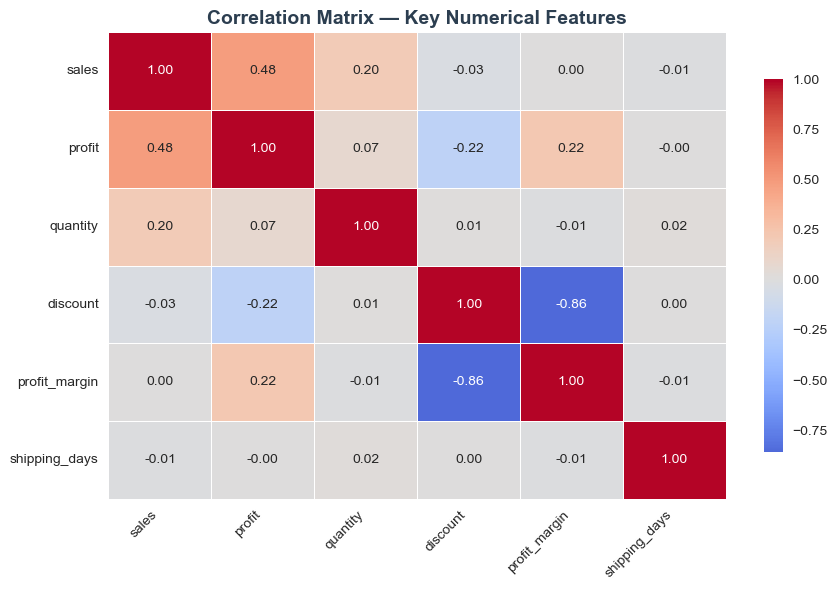

,sales,profit,quantity,discount,profit_margin,shipping_days
sales,1.00,0.48,0.20,-0.03,0.00,-0.01
profit,0.48,1.00,0.07,-0.22,0.22,-0.00
quantity,0.20,0.07,1.00,0.01,-0.01,0.02
discount,-0.03,-0.22,0.01,1.00,-0.86,0.00
profit_margin,0.00,0.22,-0.01,-0.86,1.00,-0.01
shipping_days,-0.01,-0.00,0.02,0.00,-0.01,1.00


In [16]:
# Select Key Numerical Metrics 
num_features = ['sales', 'profit', 'quantity', 'discount', 'profit_margin', 'shipping_days']
corr_matrix = df[num_features].corr().round(2)

# Visualize Correlation Strengths
plt.figure(figsize=(9, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix — Key Numerical Features", fontsize=14, fontweight='bold', color='#2c3e50')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.grid(visible=False)
plt.tight_layout()
plt.show()

# Styled Correlation Summary Table
def styled_correlation_table(df, title="Correlation Matrix Summary", cmap='coolwarm'):
    """Create a styled, easy-to-read correlation table with gradient background."""
    return (
        df.style
        .set_caption(f" {title}")
        .background_gradient(cmap=cmap, axis=None)
        .set_table_styles([
            {'selector': 'caption', 'props': [
                ('font-size', '14px'),
                ('font-weight', 'bold'),
                ('text-align', 'left'),
                ('color', '#2c3e50'),
                ('padding', '8px 0 4px 0')
            ]},
            {'selector': 'th', 'props': [
                ('background-color', '#2c3e50'),
                ('color', 'white'),
                ('font-size', '11px'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]},
            {'selector': 'td', 'props': [
                ('font-size', '11px'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]}
        ])
        .format(precision=2)
    )

# Display Correlation Insights 
display(styled_correlation_table(corr_matrix, "Correlation Matrix Summary"))


#### **Correlation Matrix Summary**

The correlation matrix reveals several key relationships among core business metrics. Sales and profit show a moderate positive correlation (0.48), indicating that higher sales generally contribute to higher profits, though variations in pricing or product mix may influence this link. Discounts exhibit a strong negative correlation with profit margin (-0.86), confirming that aggressive discounting significantly reduces profitability despite potentially increasing sales volume. The relationship between quantity and sales (0.20) suggests that sales growth is not solely volume-driven, possibly reflecting higher-priced products contributing disproportionately. Profit and profit margin have a modest positive correlation (0.22), implying that profit gains do not always translate into higher margins. Lastly, shipping days show minimal correlation with other metrics, suggesting that delivery times have limited direct impact on financial performance but may still affect customer satisfaction indirectly.




# Monthly Performance Analysis
This section provides a comprehensive analysis of the Superstore's monthly performance trends, tracking key business metrics over time to identify patterns, seasonal variations, and growth opportunities. The analysis transforms transactional data into actionable insights through time series aggregation and multi-dimensional visualization.

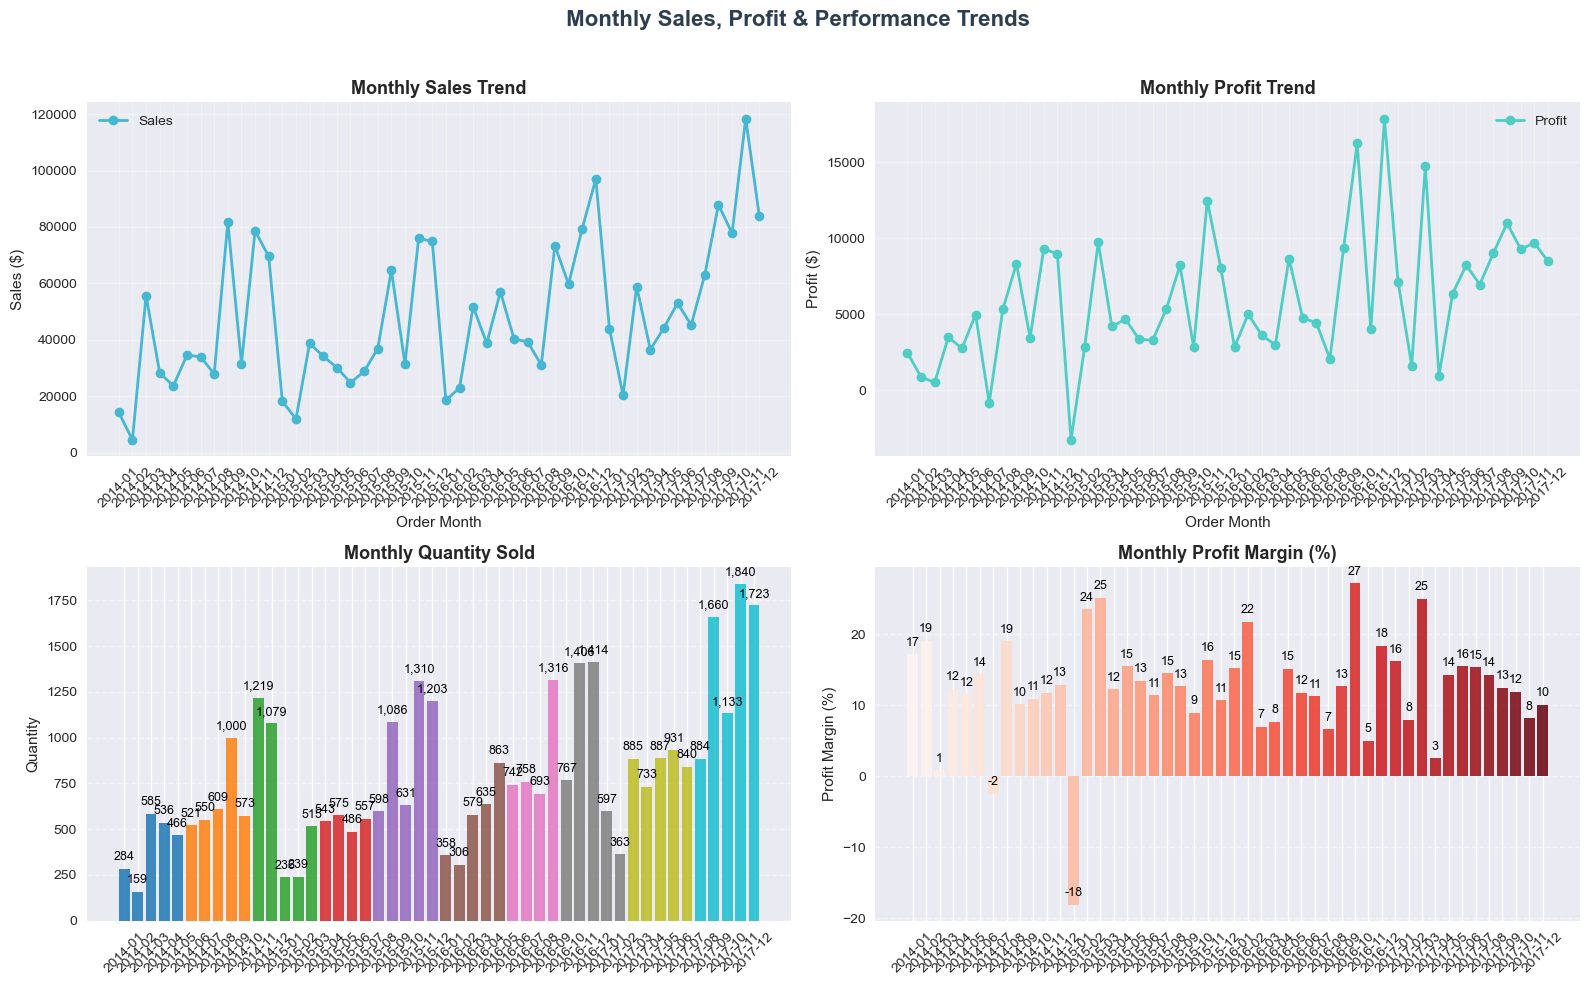

 Overall Performance Summary
Total Sales: $2,297,201
Total Profit: $286,397
Average Profit Margin: 12.47%
Total Orders: 5,009


,order_month,sales,profit,quantity,order_id,profit_margin
36,2017-01,"$43,971","$7,140",597,69,16.24%
37,2017-02,"$20,301","$1,614",363,53,7.95%
38,2017-03,"$58,872","$14,752",885,118,25.06%
39,2017-04,"$36,522",$933,733,116,2.56%
40,2017-05,"$44,261","$6,343",887,118,14.33%
41,2017-06,"$52,982","$8,223",931,133,15.52%
42,2017-07,"$45,264","$6,953",840,111,15.36%
43,2017-08,"$63,121","$9,041",884,111,14.32%
44,2017-09,"$87,867","$10,992","1,660",226,12.51%
45,2017-10,"$77,777","$9,275","1,133",147,11.93%


In [17]:
# Prepare and structure the data 
# Ensure order dates are correctly formatted and extract month-year.
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)

# Aggregate monthly performance metrics
monthly_performance = (
    df.groupby('order_month')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'quantity': 'sum',
          'order_id': 'nunique'
      })
      .reset_index()
      .sort_values('order_month')
)

# Compute profit margin while safely handling division issues.
monthly_performance['profit_margin'] = (
    (monthly_performance['profit'] / monthly_performance['sales']) * 100
).replace([np.inf, -np.inf], np.nan).fillna(0)

#  Visualize Key Monthly Trends 
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(' Monthly Sales, Profit & Performance Trends', 
             fontsize=16, fontweight='bold', color='#2c3e50')

# Sales Over Time
axes[0, 0].plot(
    monthly_performance['order_month'], 
    monthly_performance['sales'], 
    marker='o', color='#45B7D1', linewidth=2, label='Sales'
)
axes[0, 0].set_title('Monthly Sales Trend', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Order Month')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()
add_bar_values(axes[0, 0])

# Profit Over Time
axes[0, 1].plot(
    monthly_performance['order_month'], 
    monthly_performance['profit'], 
    marker='o', color='#4ECDC4', linewidth=2, label='Profit'
)
axes[0, 1].set_title('Monthly Profit Trend', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Order Month')
axes[0, 1].set_ylabel('Profit ($)')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()
add_bar_values(axes[0, 1])

# Quantity Sold per Month
multi_color_bars(
    axes[1, 0],
    x=monthly_performance['order_month'],
    y=monthly_performance['quantity'],
    title='Monthly Quantity Sold',
    ylabel='Quantity'
)

# Profit Margin Percentage
multi_color_bars(
    axes[1, 1],
    x=monthly_performance['order_month'],
    y=monthly_performance['profit_margin'],
    title='Monthly Profit Margin (%)',
    ylabel='Profit Margin (%)',
    cmap_name='Reds'
)

# Final aesthetic touches
for ax in axes.ravel():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Summarize Key Insights 
print(" Overall Performance Summary")
print(f"Total Sales: ${monthly_performance['sales'].sum():,.0f}")
print(f"Total Profit: ${monthly_performance['profit'].sum():,.0f}")
print(f"Average Profit Margin: {monthly_performance['profit_margin'].mean():.2f}%")
print(f"Total Orders: {monthly_performance['order_id'].sum():,.0f}")

# Styled 12-Month Summary Table 
display(
    styled_table(
        monthly_performance.tail(12).assign(
            sales=monthly_performance['sales'].map('${:,.0f}'.format),
            profit=monthly_performance['profit'].map('${:,.0f}'.format),
            profit_margin=monthly_performance['profit_margin'].map('{:.2f}%'.format),
            quantity=monthly_performance['quantity'].map('{:,.0f}'.format),
            order_id=monthly_performance['order_id'].map('{:,.0f}'.format)
        ),
        title="Recent 12-Month Performance Summary",
        cmap='YlGnBu'
    )
)


## Overall Performance Summary

The overall business performance demonstrates strong financial health and consistent profitability throughout the analysis period. The company achieved `total sales of $2,297,201` and a `total profit of $286,397`, resulting in an `average profit margin of 12.47%` across `5,009 total orders`. This indicates a healthy balance between revenue generation and cost efficiency.


###  Key Insights

- **Highest Sales:** November 2017 recorded the strongest sales month at **$118,448**, driven by high order volume.  
- **Most Profitable Month:** March 2017 achieved the highest profit margin of **25.06%**, indicating strong pricing or cost control.  
- **Lowest Margin:** April 2017 had a notably low margin of **2.56%**, suggesting operational inefficiencies or discounting activity.  
- Overall, sales and profit show **steady growth toward year-end**, signaling a strong finish to the fiscal period.


# Category Performance Analysis
This section provides a comprehensive breakdown of business performance across product categories, enabling strategic decision-making for inventory management, marketing focus, and resource allocation. By analyzing sales, profit, and margin metrics at the category level, we identify which product lines drive the most value and where optimization opportunities exist.

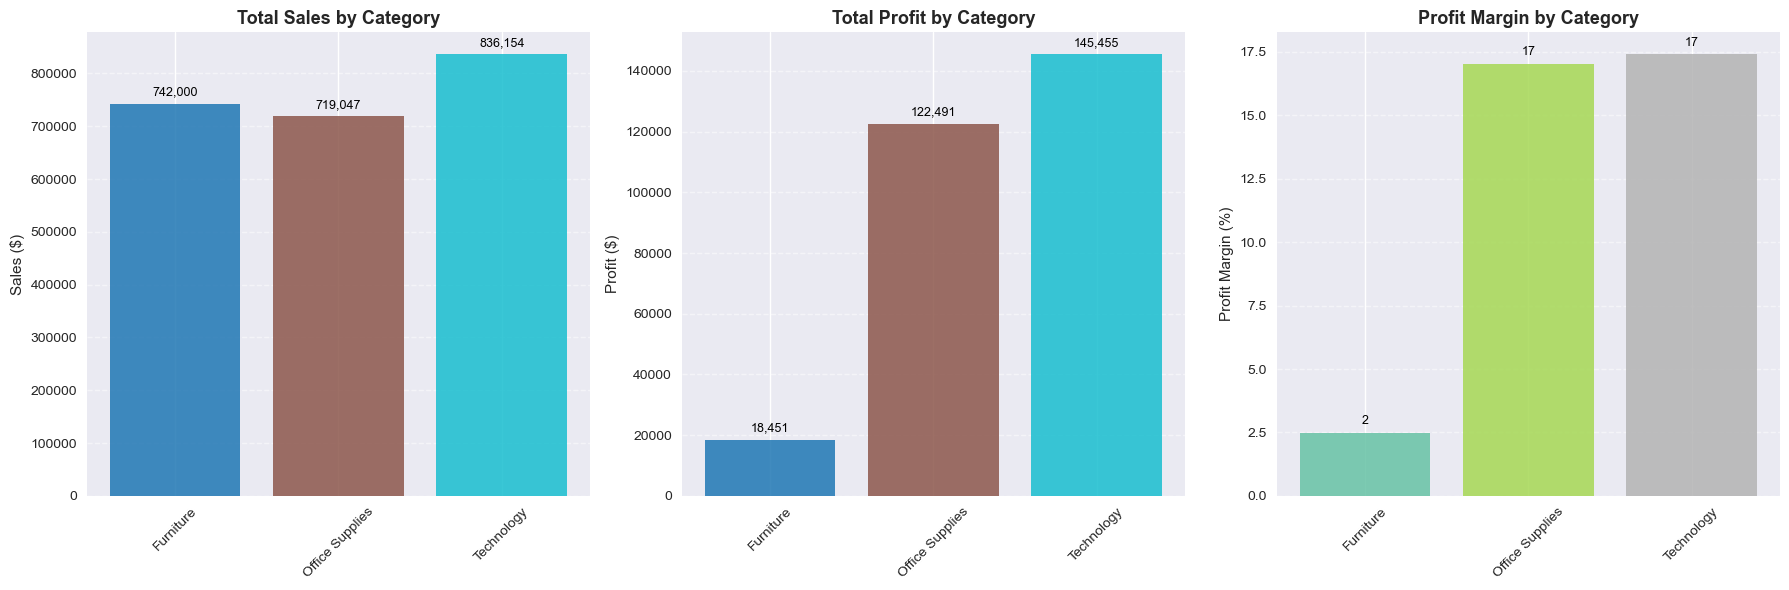

,category,sales,profit,quantity,order_id,profit_margin
0,Furniture,"741,999.80","18,451.27","8,028","1,764",2.49
1,Office Supplies,"719,047.03","122,490.80","22,906","3,742",17.04
2,Technology,"836,154.03","145,454.95","6,939","1,544",17.40


In [18]:
# Aggregate data by category
category_analysis = (
    df.groupby('category', as_index=False)
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'quantity': 'sum',
          'order_id': 'nunique'
      })
)

# Compute Profit Margin
category_analysis['profit_margin'] = (
    (category_analysis['profit'] / category_analysis['sales']) * 100
).round(2)

# Visual Overview
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

multi_color_bars(
    axes[0],
    category_analysis['category'],
    category_analysis['sales'],
    "Total Sales by Category",
    "Sales ($)"
)

multi_color_bars(
    axes[1],
    category_analysis['category'],
    category_analysis['profit'],
    "Total Profit by Category",
    "Profit ($)"
)

multi_color_bars(
    axes[2],
    category_analysis['category'],
    category_analysis['profit_margin'],
    "Profit Margin by Category",
    "Profit Margin (%)",
    cmap_name='Set2'
)

plt.tight_layout()
plt.show()

#  Summary Table
display(styled_table(category_analysis, " Category Performance Summary", cmap='Greens'))


#### Category Performance Summary

This section provides an overview of how each **product category** contributes to overall business performance across key financial and operational metrics. The analysis compares **total sales**, **profit**, **order volume**, and **profit margin** for the three main categories: *Furniture*, *Office Supplies*, and *Technology*.  

####  Insights
- **Technology** leads in both **sales** and **profit**, with the highest overall profitability margin of **17.4%**.  
- **Office Supplies** follows closely, maintaining healthy margins (**17.0%**) despite high order volume.  
- **Furniture**, while generating significant sales, shows a **low profit margin (2.49%)**, suggesting higher costs or discounting pressures.  

Overall, profitability is concentrated in **Technology** and **Office Supplies**, while **Furniture** may require strategic pricing or supply chain optimization to improve returns.


# Regional Performance Analysis

This section evaluates how each **region** contributes to the company’s financial performance.  
The analysis explores key indicators such as **total sales**, **profit**, **unique customers**, and **orders**, alongside derived metrics like **profit margin**, **average order value (AOV)**, and **sales per customer**.  



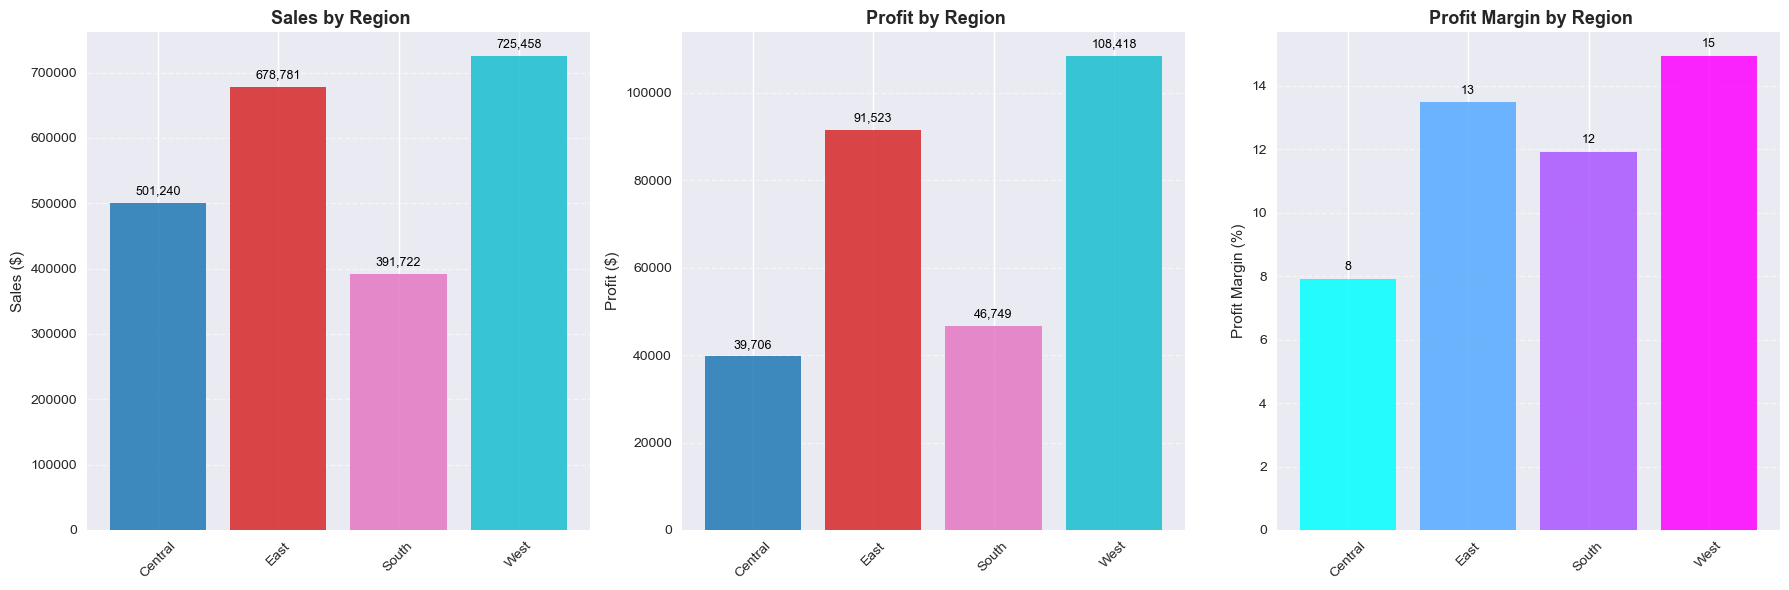

,region,sales,profit,customer_id,order_id,profit_margin,avg_order_value,sales_per_customer
0,Central,"501,239.89","39,706.36",629,"1,175",7.92,426.59,796.88
1,East,"678,781.24","91,522.78",674,"1,401",13.48,484.50,"1,007.09"
2,South,"391,721.91","46,749.43",512,822,11.93,476.55,765.08
3,West,"725,457.82","108,418.45",686,"1,611",14.94,450.32,"1,057.52"


In [19]:

# Compute Key Metrics 
regional_analysis = (
    df.groupby('region')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'customer_id': 'nunique',
          'order_id': 'nunique'
      })
      .reset_index()
)

# Derive Performance Indicators 
regional_analysis['profit_margin'] = (
    (regional_analysis['profit'] / regional_analysis['sales']) * 100
).round(2)

regional_analysis['avg_order_value'] = (
    regional_analysis['sales'] / regional_analysis['order_id']
).round(2)

regional_analysis['sales_per_customer'] = (
    regional_analysis['sales'] / regional_analysis['customer_id']
).round(2)

#  Visualization Setup 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

multi_color_bars(
    axes[0],
    regional_analysis['region'],
    regional_analysis['sales'],
    " Sales by Region",
    "Sales ($)"
)

multi_color_bars(
    axes[1],
    regional_analysis['region'],
    regional_analysis['profit'],
    " Profit by Region",
    "Profit ($)"
)

multi_color_bars(
    axes[2],
    regional_analysis['region'],
    regional_analysis['profit_margin'],
    " Profit Margin by Region",
    "Profit Margin (%)",
    cmap_name='cool'
)

plt.tight_layout()
plt.show()

# --- Styled Summary Table ---
display(
    styled_table(
        regional_analysis,
        "Regional Performance Summary",
        cmap='Purples'
    )
)


 
The **Regional Performance Summary** highlights the distribution of sales and profitability across all regions. The West region leads in both total sales `($725,457.82)` and profit `($108,418.45)`, achieving the highest profit margin of `14.94%`. The East region follows closely with strong sales of `$678,781.24` and a solid profit margin of `13.48%`, reflecting consistent revenue performance. The Central and South regions, while generating moderate sales, maintain balanced efficiency with average order values around `$426–$476` and profit margins between `7.92% and 11.93%`. Overall, the data suggests that while the West dominates in revenue and profitability, all regions exhibit healthy contributions to the company’s overall financial stability and customer engagement.


# Customer Segment Analysis
This section provides a clear view of how different customer segments contribute to overall business performance.
We start by summarizing each segment’s sales, profit, and order activity, then compute essential indicators like profit margin, average order value, and orders per customer to reveal deeper insights into customer engagement and value generation.

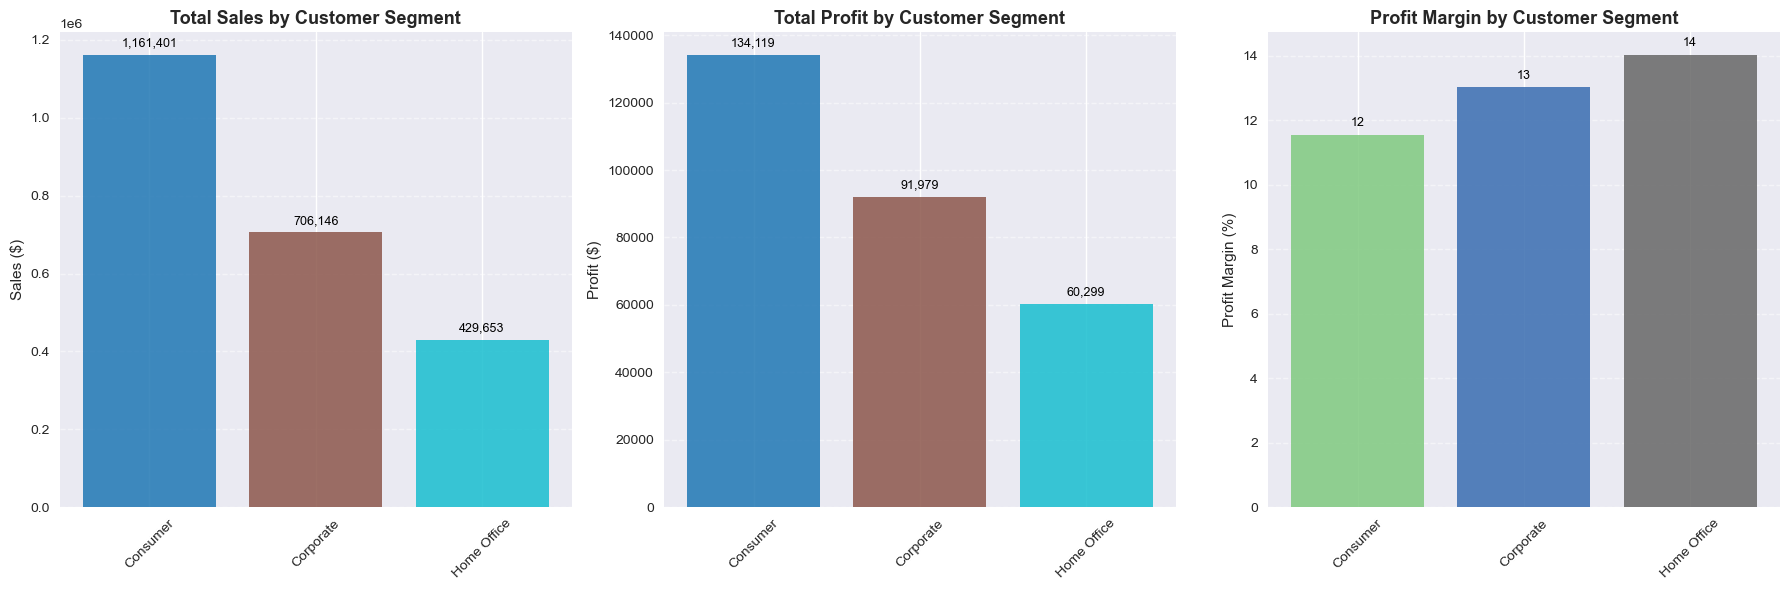

,segment,sales,profit,customer_id,order_id,quantity,profit_margin,avg_order_value,orders_per_customer
0,Consumer,"1,161,401.34","134,119.21",409,"2,586","19,521",11.55,449.11,6.32
1,Corporate,"706,146.37","91,979.13",236,"1,514","11,608",13.03,466.41,6.42
2,Home Office,"429,653.15","60,298.68",148,909,"6,744",14.03,472.67,6.14


In [20]:


# Aggregate key performance metrics by segment
segment_analysis = (
    df.groupby('segment')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'customer_id': 'nunique',
          'order_id': 'nunique',
          'quantity': 'sum'
      })
      .reset_index()
)

# Derive insightful performance indicators
segment_analysis['profit_margin'] = (segment_analysis['profit'] / segment_analysis['sales'] * 100).round(2)
segment_analysis['avg_order_value'] = (segment_analysis['sales'] / segment_analysis['order_id']).round(2)
segment_analysis['orders_per_customer'] = (segment_analysis['order_id'] / segment_analysis['customer_id']).round(2)

# Visualize segment-level performance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

multi_color_bars(
    axes[0],
    segment_analysis['segment'],
    segment_analysis['sales'],
    "Total Sales by Customer Segment",
    "Sales ($)"
)

multi_color_bars(
    axes[1],
    segment_analysis['segment'],
    segment_analysis['profit'],
    "Total Profit by Customer Segment",
    "Profit ($)"
)

multi_color_bars(
    axes[2],
    segment_analysis['segment'],
    segment_analysis['profit_margin'],
    "Profit Margin by Customer Segment",
    "Profit Margin (%)",
    cmap_name='Accent'
)

plt.tight_layout()
plt.show()

# Present a styled summary table
display(
    styled_table(
        segment_analysis,
        "Customer Segment Performance Summary",
        cmap='Blues'
    )
)


**Insight Summary**

The Consumer segment generates the highest total sales at $1.16M, highlighting its dominance in revenue contribution.
Meanwhile, the Home Office segment achieves the highest profit margin (14.03%), indicating a more efficient balance between revenue and cost.
Both Corporate and Home Office customers maintain a steady engagement level, averaging about 6 orders per customer, showing consistent purchasing behavior across all segments.
Overall, the analysis reveals strong, balanced performance across customer groups, with opportunities to optimize pricing and customer retention strategies for even higher profitability.

## Shipping Mode Performance Analysis

This section analyzes how different shipping modes perform in terms of sales, delivery speed, and profitability.

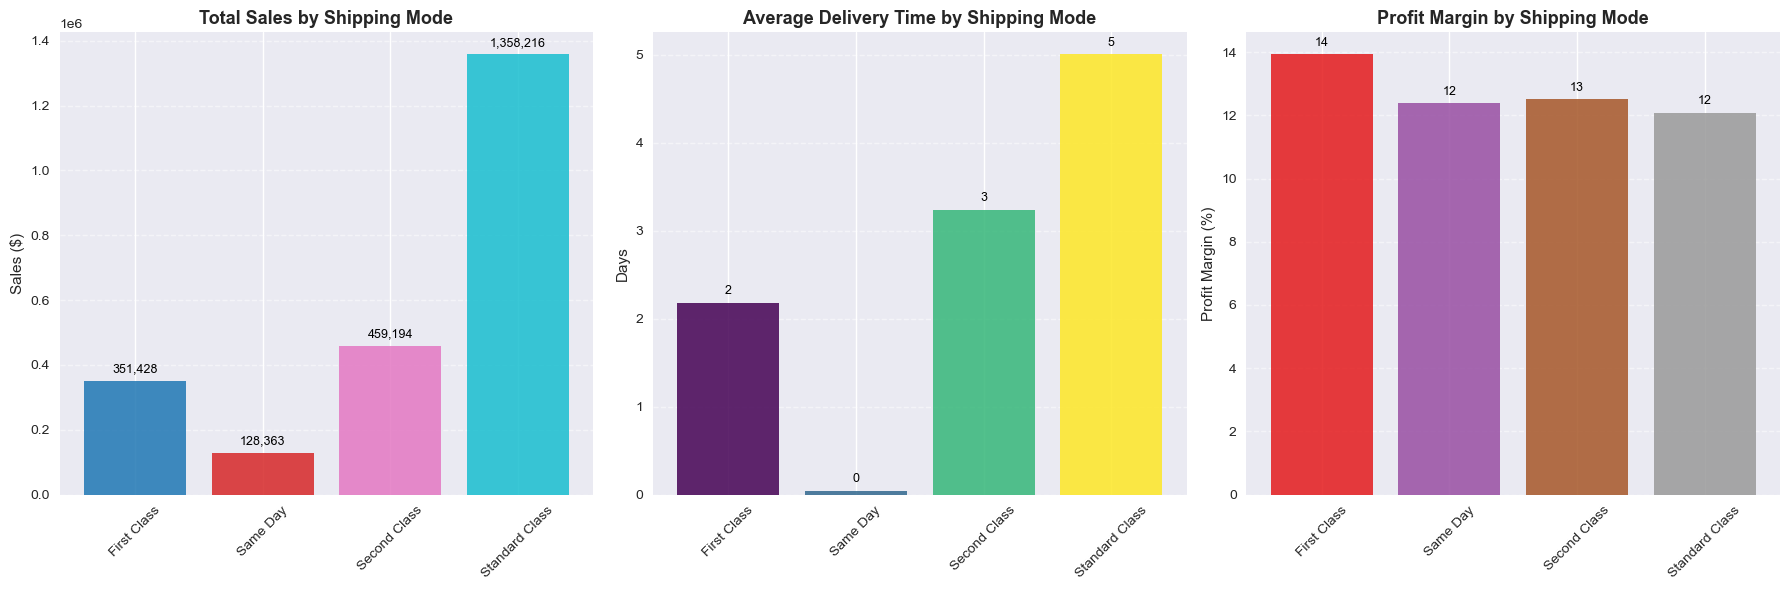

,ship_mode,sales,profit,order_id,shipping_days,profit_margin,avg_order_value
0,First Class,"351,428.42","48,969.84",787,2.18,13.93,446.54
1,Same Day,"128,363.12","15,891.76",264,0.04,12.38,486.22
2,Second Class,"459,193.57","57,446.64",964,3.24,12.51,476.34
3,Standard Class,"1,358,215.74","164,088.79","2,994",5.01,12.08,453.65


In [21]:
# Aggregate key metrics by shipping mode
shipping_analysis = (
    df.groupby('ship_mode')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'order_id': 'nunique',
          'shipping_days': 'mean'
      })
      .reset_index()
)

#  Compute profitability and efficiency metrics
shipping_analysis['profit_margin'] = (
    (shipping_analysis['profit'] / shipping_analysis['sales']) * 100
).round(2)
shipping_analysis['avg_order_value'] = (
    shipping_analysis['sales'] / shipping_analysis['order_id']
).round(2)

#  Visualize key shipping insights 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

multi_color_bars(
    axes[0],
    shipping_analysis['ship_mode'],
    shipping_analysis['sales'],
    "Total Sales by Shipping Mode",
    "Sales ($)"
)

multi_color_bars(
    axes[1],
    shipping_analysis['ship_mode'],
    shipping_analysis['shipping_days'],
    "Average Delivery Time by Shipping Mode",
    "Days",
    cmap_name='viridis'
)

multi_color_bars(
    axes[2],
    shipping_analysis['ship_mode'],
    shipping_analysis['profit_margin'],
    "Profit Margin by Shipping Mode",
    "Profit Margin (%)",
    cmap_name='Set1'
)

plt.tight_layout()
plt.show()

#  Styled Summary Table
display(
    styled_table(
        shipping_analysis,
        "Shipping Mode Performance Summary",
        cmap='Oranges'
    )
)


The shipping mode analysis reveals that Standard Class is the dominant performer, generating the highest sales `($1.36M)` and profit ($164K) despite having the longest average delivery time of about five days. First Class and Second Class follow with moderate sales and profits, balancing speed and profitability effectively, while Same Day shipping, though the fastest with near instant delivery, contributes the least in total sales volume but maintains a solid profit margin of `12.38%`. Overall, faster shipping modes tend to achieve slightly higher profitability per order, but Standard Class remains the key driver of overall revenue due to its large order volume.


# Discount Strategy Impact Analysis
This section examines the critical relationship between discount strategies and business performance, providing data driven insights into how different discount levels affect sales volume, profitability, and overall business health. Understanding this relationship is essential for optimizing pricing strategies and maximizing revenue.

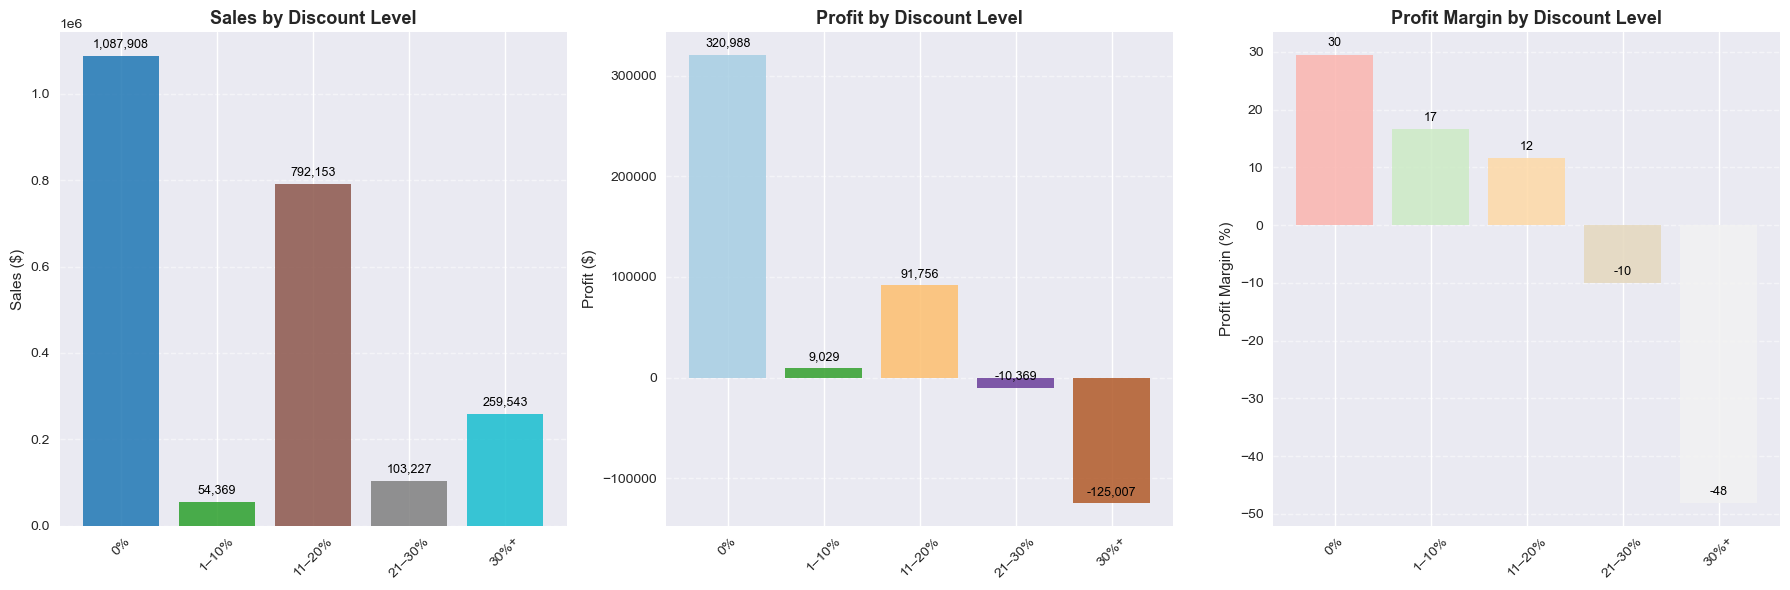

,discount_segment,sales,profit,quantity,order_id,profit_margin,avg_order_value
0,0%,"1,087,908.47","320,987.60","18,267","2,644",29.51,411.46
1,1–10%,"54,369.35","9,029.18",373,89,16.61,610.89
2,11–20%,"792,152.89","91,756.30","13,858","2,436",11.58,325.19
3,21–30%,"103,226.65","-10,369.28",849,211,-10.05,489.23
4,30%+,"259,543.49","-125,006.78","4,526",888,-48.16,292.28


In [22]:
# Segment orders based on discount brackets for easier interpretation
df['discount_segment'] = pd.cut(
    df['discount'],
    bins=[-0.1, 0, 0.1, 0.2, 0.3, 1],
    labels=['0%', '1–10%', '11–20%', '21–30%', '30%+']
)

#  Aggregate key performance metrics by discount level 
discount_analysis = (
    df.groupby('discount_segment')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'quantity': 'sum',
          'order_id': 'nunique'
      })
      .reset_index()
)

# Compute performance insights
discount_analysis['profit_margin'] = (
    discount_analysis['profit'] / discount_analysis['sales'] * 100
).round(2)

discount_analysis['avg_order_value'] = (
    discount_analysis['sales'] / discount_analysis['order_id']
).round(2)

# Visual Analysis: Discount vs Sales, Profit & Margin
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

multi_color_bars(
    axes[0],
    discount_analysis['discount_segment'],
    discount_analysis['sales'],
    "Sales by Discount Level",
    "Sales ($)"
)

multi_color_bars(
    axes[1],
    discount_analysis['discount_segment'],
    discount_analysis['profit'],
    "Profit by Discount Level",
    "Profit ($)",
    cmap_name='Paired'
)

multi_color_bars(
    axes[2],
    discount_analysis['discount_segment'],
    discount_analysis['profit_margin'],
    "Profit Margin by Discount Level",
    "Profit Margin (%)",
    cmap_name='Pastel1'
)

plt.tight_layout()
plt.show()

# Summary Table
display(
    styled_table(
        discount_analysis,
        "Discount Impact Summary",
        cmap='Reds'
    )
)


The discount impact analysis highlights a clear inverse relationship between discount levels and profitability. Sales without discounts (0%) generate the highest profit ($320,987.60) and the strongest profit margin (29.51%), demonstrating that full-priced sales deliver the most sustainable returns. Moderate discounts (1–10%) maintain profitability, though margins decline to 16.61%, while deeper discounts (11–20%) continue to erode margins to 11.58%. Once discounts exceed 20%, profitability turns negative, with the 21–30% segment posting a -10.05% margin and discounts above 30% resulting in substantial losses (-48.16%). Despite these high-discount segments contributing notable sales volumes, their negative profit outcomes indicate that heavy discounting severely undermines overall business performance. This underscores the importance of strategic discount management to balance competitive pricing with long-term profit sustainability.

# CUSTOMER LIFETIME VALUE ANALYSIS
The **Customer Lifetime Value (CLV) Analysis** provides insights into how customers contribute to overall profitability based on their purchasing behavior, order frequency, and lifetime engagement with the business.
By segmenting customers into **Low-value, Medium-value, and High-Value groups**, we can identify which customer tiers drive the majority of sales and profits  and where opportunities for growth or retention lie.

In [23]:
# Aggregate customer-level data 
customer_analysis = (
    df.groupby('customer_id')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'order_id': 'nunique',
          'order_date': ['min', 'max']
      })
      .round(2)
)

# Clean column names for readability
customer_analysis.columns = [
    'total_sales', 'total_profit', 'order_count',
    'first_purchase', 'last_purchase'
]
customer_analysis = customer_analysis.reset_index()

# Derived metrics
customer_analysis['avg_order_value'] = (
    customer_analysis['total_sales'] / customer_analysis['order_count']
).round(2)

customer_analysis['customer_lifetime'] = (
    (customer_analysis['last_purchase'] - customer_analysis['first_purchase']).dt.days
)

# Segment customers based on total sales
customer_analysis['customer_segment'] = pd.cut(
    customer_analysis['total_sales'],
    bins=[0, 1000, 5000, float('inf')],
    labels=['Low-Value', 'Medium-Value', 'High-Value']
)

# Summarize customer segments
segment_summary = (
    customer_analysis.groupby('customer_segment')
    .agg({
        'customer_id': 'count',
        'total_sales': 'sum',
        'total_profit': 'sum',
        'order_count': 'mean',
        'avg_order_value': 'mean'
    })
    .round(2)
)

# Add share of customers and sales
segment_summary['pct_customers'] = (
    segment_summary['customer_id'] / segment_summary['customer_id'].sum() * 100
).round(2)
segment_summary['pct_sales'] = (
    segment_summary['total_sales'] / segment_summary['total_sales'].sum() * 100
).round(2)

#  summary table
display(styled_table(segment_summary, "Customer Segmentation Summary", cmap='YlGnBu'))

# Highlight key customer lifetime insights
print("\n Customer Lifetime Insights:")
print(f" Average Customer Lifetime: {customer_analysis['customer_lifetime'].mean():.1f} days")
print(f" Average Orders per Customer: {customer_analysis['order_count'].mean():.1f}")
print(f" Average Order Value: ${customer_analysis['avg_order_value'].mean():,.2f}")



,customer_id,total_sales,total_profit,order_count,avg_order_value,pct_customers,pct_sales
customer_segment,,,,,,,
Low-Value,167,"92,333.16","11,173.93",4.12,145.54,21.06,4.02
Medium-Value,509,"1,292,909.46","134,910.09",6.63,415.66,64.19,56.28
High-Value,117,"911,958.26","140,313.12",8.09,"1,102.75",14.75,39.70



 Customer Lifetime Insights:
 Average Customer Lifetime: 999.7 days
 Average Orders per Customer: 6.3
 Average Order Value: $460.15


`The customer lifetime value analysis reveals that Medium-Value customers make up the majority of the customer base (64%), contributing over half of total sales (56%) and serving as the core revenue drivers with balanced profit margins. High-Value customers, though representing only 14.75% of the base, account for nearly 40% of total sales, demonstrating their strong profitability through a higher average order value ($1,102.75) and more frequent purchases  making them the most important group to retain and reward. In contrast, Low-Value customers constitute about 21% of the base but contribute just 4% of total sales, indicating potential for targeted upselling or cross selling strategies. Overall, the metrics suggest long term customer relationships and consistent purchasing behavior, emphasizing the need for enhanced retention programs and personalized engagement  particularly among high-value customers  to further boost lifetime revenue. Strategically, loyalty initiatives should focus on High-Value customers to deepen retention, Medium-Value customers should be nurtured toward higher spending tiers through tailored offers, and Low-Value customers should be re-engaged with discount incentives or bundled promotions to increase both order value and frequency.`

# PRODUCT PERFORMANCE DEEP DIVE
This section provides a granular analysis of individual product performance, identifying top performers, loss leaders, and the impact of discount strategies at the product level. By examining performance metrics for each SKU, we can make data driven decisions about product portfolio optimization, pricing strategies, and inventory management.


In [24]:
# Aggregate performance metrics by product 
product_performance = (
    df.groupby('product_id')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'quantity': 'sum',
          'order_id': 'nunique'
      })
      .reset_index()
)

# Compute profit margin as a percentage 
product_performance['profit_margin'] = (
    (product_performance['profit'] / product_performance['sales']) * 100
).round(2)

# Enrich dataset with product details 
product_performance = product_performance.merge(
    df[['product_id', 'product_name', 'category', 'sub-category']].drop_duplicates(),
    on='product_id'
)

#  Identify top and bottom 10 performers
top_products = (
    product_performance.nlargest(10, 'profit')
    [['product_name', 'category', 'sub-category', 'sales', 'profit', 'profit_margin']]
)
worst_products = (
    product_performance.nsmallest(10, 'profit')
    [['product_name', 'category', 'sub-category', 'sales', 'profit', 'profit_margin']]
)

# Display tables for insights
display(styled_table(top_products, " Top 10 Best Performing Products", cmap='Greens'))
display(styled_table(worst_products, " Bottom 10 Lowest Performing Products", cmap='Reds'))

# Analyze impact of high discounts
high_discount_products = (
    df[df['discount'] > 0.3]
    .groupby('product_id')
    .agg({
        'sales': 'sum',
        'profit': 'sum',
        'discount': 'mean'
    })
    .reset_index()
)

high_discount_products['profit_margin'] = (
    (high_discount_products['profit'] / high_discount_products['sales']) * 100
).round(2)

# Summarize discount insights
num_discounted = len(high_discount_products)
avg_discount_margin = high_discount_products['profit_margin'].mean() if num_discounted > 0 else 0

print(f"\n Products with >30% Discount: {num_discounted}")
if num_discounted > 0:
    print(f" Average Profit Margin (High-Discount Segment): {avg_discount_margin:.2f}%")




,product_name,category,sub-category,sales,profit,profit_margin
1640,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,"61,599.82","25,199.93",40.91
787,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,"27,453.38","7,753.04",28.24
1630,Hewlett Packard LaserJet 3310 Copier,Technology,Copiers,"18,839.69","6,983.88",37.07
1637,Canon PC1060 Personal Laser Copier,Technology,Copiers,"11,619.83","4,570.93",39.34
1540,Logitech G19 Programmable Gaming Keyboard,Technology,Accessories,"13,756.54","4,425.34",32.17
1541,Plantronics Savi W720 Multi-Device Wireless Headset System,Technology,Accessories,"13,756.54","4,425.34",32.17
1657,"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",Technology,Machines,"18,374.90","4,094.98",22.29
1693,Ativa V4110MDD Micro-Cut Shredder,Technology,Machines,"7,699.89","3,772.95",49.00
1656,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,Machines,"14,299.89","3,717.97",26.00
692,Ibico EPK-21 Electric Binding System,Office Supplies,Binders,"15,875.92","3,345.28",21.07


,product_name,category,sub-category,sales,profit,profit_margin
1645,Cubify CubeX 3D Printer Double Head Print,Technology,Machines,"11,099.96","-8,879.97",-80.00
1650,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,"16,829.90","-4,589.97",-27.27
1696,Cubify CubeX 3D Printer Triple Head Print,Technology,Machines,"7,999.98","-3,839.99",-48.00
326,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,Furniture,Tables,"9,917.64","-2,876.12",-29.00
344,Bush Advantage Collection Racetrack Conference Table,Furniture,Tables,"9,544.73","-1,934.40",-20.27
858,GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,"17,965.07","-1,878.17",-10.45
1669,Cisco TelePresence System EX90 Videoconferencing Unit,Technology,Machines,"22,638.48","-1,811.08",-8.00
1465,Martin Yale Chadless Opener Electric Letter Opener,Office Supplies,Supplies,"16,656.20","-1,299.18",-7.80
346,Balt Solid Wood Round Tables,Furniture,Tables,"6,518.75","-1,201.06",-18.42
375,BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,Furniture,Tables,"1,706.25","-1,148.44",-67.31



 Products with >30% Discount: 563
 Average Profit Margin (High-Discount Segment): -86.88%


`The product performance analysis reveals that profitability is largely driven by technology related products, especially Copiers and Accessories, which demonstrate strong margins and consistent demand. In contrast, categories such as Machines and Furniture (particularly Tables) show persistent losses due to high costs and excessive discounting. The study further highlights that over 500 products sold at discounts above 30% suffered an average margin loss of nearly -87%, confirming that deep discounting severely undermines profitability. To strengthen performance, the business should tighten discount controls, reassess unprofitable product lines like Cubify 3D Printers and Lexmark Machines, and replicate successful pricing strategies from top performing brands such as Canon and HP. Focusing on high margin tech products and sustainable pricing will enhance overall profitability and long term revenue stability.`

# Seasonal Trends & Performance Analysis
This section analyzes seasonal patterns and temporal performance trends to identify recurring business cycles, peak performance periods, and growth trajectories. Understanding seasonality is crucial for strategic planning, inventory management, and resource allocation throughout the year.

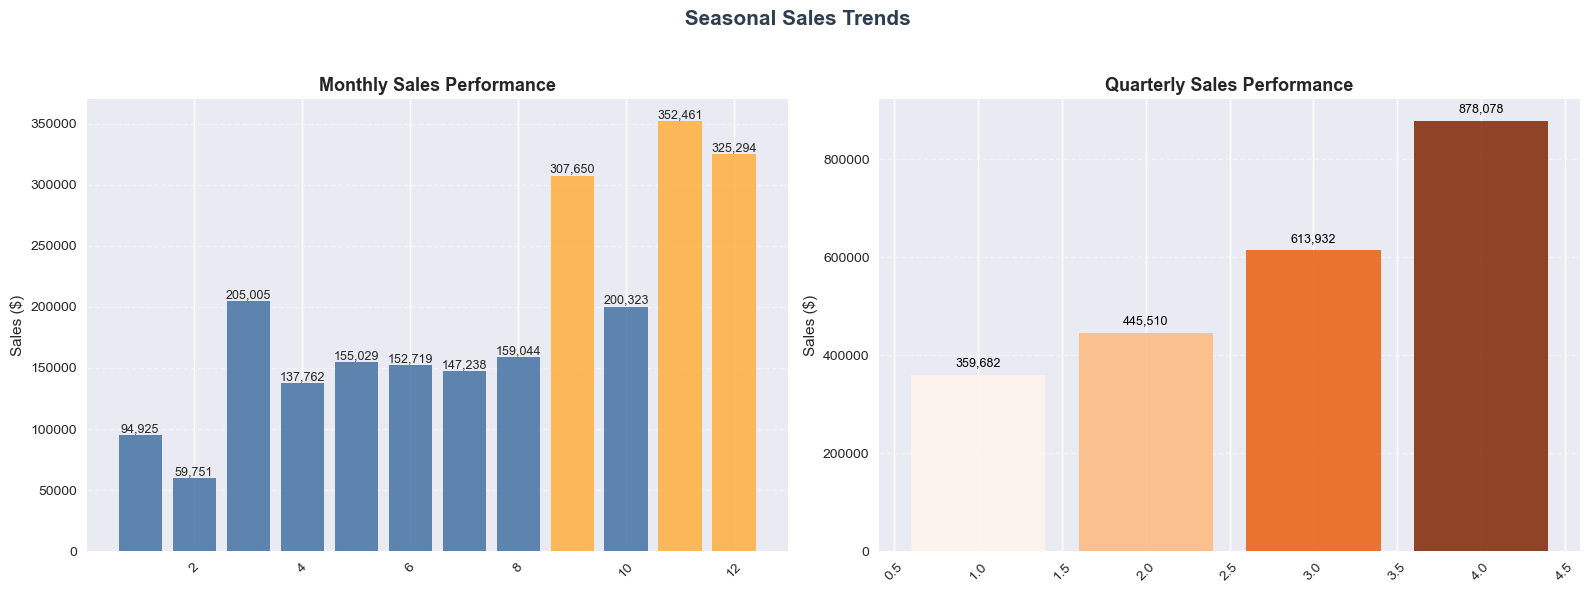

,month,sales,profit,order_id,profit_margin
0,1,"94,924.84","9,134.45",178,9.62
1,2,"59,751.25","10,294.61",162,17.23
2,3,"205,005.49","28,594.69",354,13.95
3,4,"137,762.13","11,587.44",343,8.41
4,5,"155,028.81","22,411.31",369,14.46
5,6,"152,718.68","21,285.80",364,13.94
6,7,"147,238.10","13,832.66",338,9.39
7,8,"159,044.06","21,776.94",341,13.69
8,9,"307,649.95","36,857.48",688,11.98
9,10,"200,322.98","31,784.04",417,15.87


,quarter,sales,profit,order_id,profit_margin,sales_growth_qoq,profit_growth_qoq
0,1,"359,681.58","48,023.74",694,13.35,nan,nan
1,2,"445,509.62","55,284.54","1,076",12.41,23.86,15.12
2,3,"613,932.11","72,467.08","1,367",11.80,37.80,31.08
3,4,"878,077.56","110,621.66","1,872",12.60,43.03,52.65



 Key Seasonal Insights
 Top 3 Months for Sales: 11, 12, 9
 Best Month: Month 11 with $352,461.07 in sales and a 10.06% profit margin.
 Lowest Month: Month 2 with $59,751.25 in sales and a 17.23% margin.

 Strongest Quarter: Q4 — $878,077.56 sales, 12.60% margin.
 Weakest Quarter: Q1 — $359,681.58 sales, 13.35% margin.

 Quarter-over-Quarter Growth Highlights:
   - Q2: Sales Growth 23.86%, Profit Growth 15.12%
   - Q3: Sales Growth 37.80%, Profit Growth 31.08%
   - Q4: Sales Growth 43.03%, Profit Growth 52.65%


In [25]:

# Aggregate Monthly and Quarterly Performance 
monthly_seasonality = (
    df.groupby('month')
      .agg({'sales': 'sum', 'profit': 'sum', 'order_id': 'nunique'})
      .reset_index()
)

quarterly_seasonality = (
    df.groupby('quarter')
      .agg({'sales': 'sum', 'profit': 'sum', 'order_id': 'nunique'})
      .reset_index()
)

#  Compute Profit Margins
monthly_seasonality['profit_margin'] = (
    (monthly_seasonality['profit'] / monthly_seasonality['sales']) * 100
).round(2)
quarterly_seasonality['profit_margin'] = (
    (quarterly_seasonality['profit'] / quarterly_seasonality['sales']) * 100
).round(2)

# Calculate Quarter-over-Quarter (QoQ) Growth Rates
quarterly_seasonality['sales_growth_qoq'] = (
    quarterly_seasonality['sales'].pct_change() * 100
).round(2)
quarterly_seasonality['profit_growth_qoq'] = (
    quarterly_seasonality['profit'].pct_change() * 100
).round(2)

# Identify Top 3 Performing Months
top3_months = monthly_seasonality.nlargest(3, 'sales')

# Step 5: Visualize Monthly and Quarterly Trends
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(" Seasonal Sales Trends", fontsize=15, fontweight='bold', color='#2c3e50')

# Monthly Sales with Highlighted Top 3
colors = ['#4E79A7' if m not in top3_months['month'].values else '#FFB347' 
          for m in monthly_seasonality['month']]
bars = axes[0].bar(monthly_seasonality['month'], monthly_seasonality['sales'], color=colors, alpha=0.9)
axes[0].set_title("Monthly Sales Performance", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Sales ($)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Add labels
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', 
                 ha='center', va='bottom', fontsize=9)

# Quarterly Sales Trend
multi_color_bars(
    axes[1],
    quarterly_seasonality['quarter'],
    quarterly_seasonality['sales'],
    "Quarterly Sales Performance",
    "Sales ($)",
    cmap_name='Oranges'
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#  Tables for Monthly and Quarterly Summaries 
display(styled_table(monthly_seasonality, " Monthly Seasonality Summary", cmap='Blues'))
display(styled_table(quarterly_seasonality, " Quarterly Seasonality Summary (with QoQ Growth)", cmap='Purples'))

#  Key Insights
best_month = monthly_seasonality.loc[monthly_seasonality['sales'].idxmax()]
worst_month = monthly_seasonality.loc[monthly_seasonality['sales'].idxmin()]
best_quarter = quarterly_seasonality.loc[quarterly_seasonality['sales'].idxmax()]
worst_quarter = quarterly_seasonality.loc[quarterly_seasonality['sales'].idxmin()]

print("\n Key Seasonal Insights")
print(f" Top 3 Months for Sales: {', '.join(str(int(m)) for m in top3_months['month'])}")
print(f" Best Month: Month {int(best_month['month'])} with "
      f"${best_month['sales']:,.2f} in sales and a {best_month['profit_margin']:.2f}% profit margin.")
print(f" Lowest Month: Month {int(worst_month['month'])} with "
      f"${worst_month['sales']:,.2f} in sales and a {worst_month['profit_margin']:.2f}% margin.\n")
print(f" Strongest Quarter: Q{int(best_quarter['quarter'])} — "
      f"${best_quarter['sales']:,.2f} sales, {best_quarter['profit_margin']:.2f}% margin.")
print(f" Weakest Quarter: Q{int(worst_quarter['quarter'])} — "
      f"${worst_quarter['sales']:,.2f} sales, {worst_quarter['profit_margin']:.2f}% margin.\n")

print(" Quarter-over-Quarter Growth Highlights:")
for _, row in quarterly_seasonality.dropna().iterrows():
    print(f"   - Q{int(row['quarter'])}: Sales Growth {row['sales_growth_qoq']:.2f}%, "
          f"Profit Growth {row['profit_growth_qoq']:.2f}%")



`The seasonal analysis reveals a strong upward trend in both sales and profit throughout the year, peaking significantly in the final quarter (Q4) with $878,077.56 in sales and a 12.60% profit margin. The top performing months were November, December, and September, highlighting strong year end and late Q3 demand, while February recorded the lowest sales but maintained a high 17.23% profit margin, indicating operational efficiency despite reduced volume. Quarter-over-quarter growth was consistently positive, with Q4 showing the sharpest rise 43.03% in sales and 52.65% in profit confirming robust end of year performance. Overall, the data underscores a healthy seasonal cycle with growing momentum and profitability toward year end.`

# Regional and Category-Level Performance

We analyze and visualize performance by region, category, and sub-category using grouped aggregations and bar charts.

Techniques used:

groupby(['region', 'category'])[['sales', 'profit']].sum()

Visualization with matplotlib and seaborn.barplot()


`This helps identify top-performing regions and product categories, supporting targeted marketing and resource allocation.`

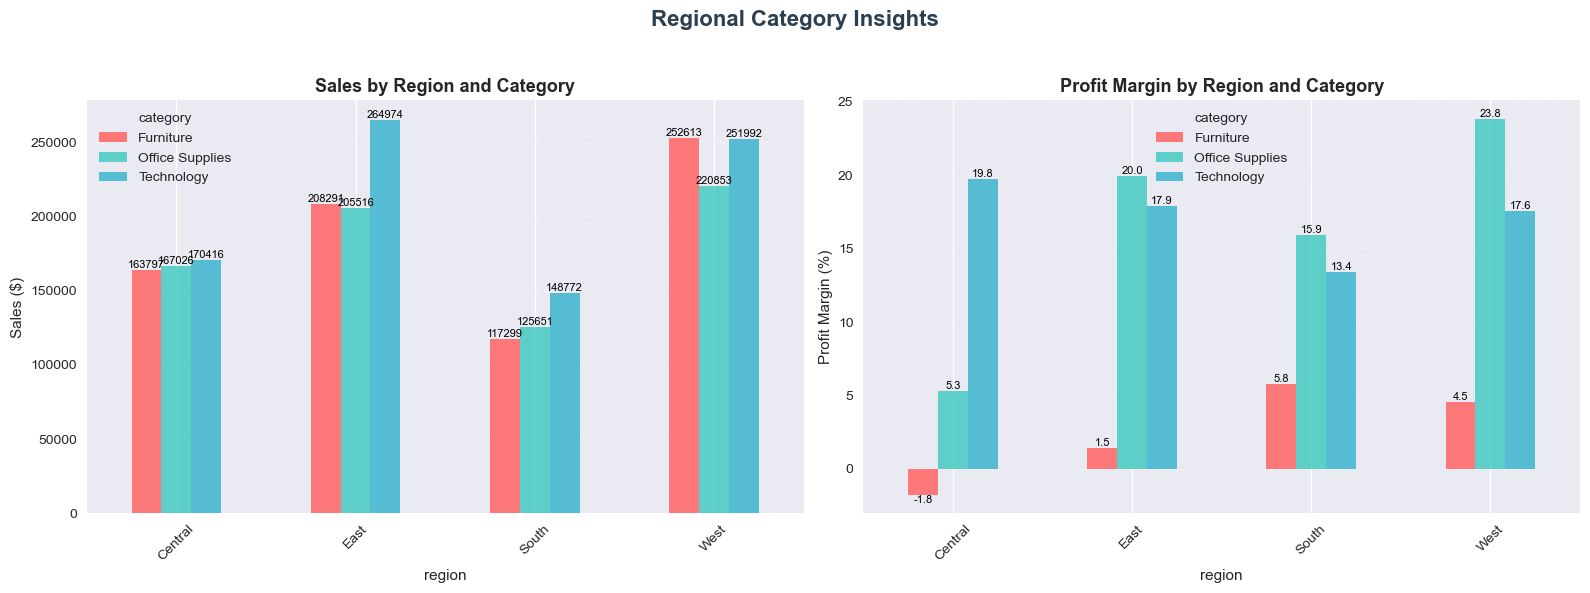

,region,category,sales,profit,order_id,profit_margin
0,Central,Furniture,"163,797.16","-2,871.05",403,-1.75
1,Central,Office Supplies,"167,026.42","8,879.98",880,5.32
2,Central,Technology,"170,416.31","33,697.43",356,19.77
3,East,Furniture,"208,291.20","3,046.17",488,1.46
4,East,Office Supplies,"205,516.05","41,014.58","1,074",19.96
5,East,Technology,"264,973.98","47,462.04",443,17.91
6,South,Furniture,"117,298.68","6,771.21",278,5.77
7,South,Office Supplies,"125,651.31","19,986.39",619,15.91
8,South,Technology,"148,771.91","19,991.83",255,13.44
9,West,Furniture,"252,612.74","11,504.95",595,4.55


In [26]:
# Aggregate Sales & Profit by Region and Category 
regional_category = (
    df.groupby(['region', 'category'])
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'order_id': 'nunique'
      })
      .reset_index()
)

# Calculate profit margin as a percentage
regional_category['profit_margin'] = (
    (regional_category['profit'] / regional_category['sales']) * 100
).round(2)

# Prepare Pivot Tables for Visualization
sales_pivot = regional_category.pivot(index='region', columns='category', values='sales')
profit_pivot = regional_category.pivot(index='region', columns='category', values='profit_margin')

# Create Dual Visualization 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Regional Category Insights", fontsize=16, fontweight='bold', color='#2c3e50')

# Sales by Region & Category
sales_pivot.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.9)
axes[0].set_title("Sales by Region and Category", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Sales ($)")
axes[0].grid(axis='y', linestyle='--', alpha=0.3)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', fontsize=8, color='black')

# Profit Margin by Region & Category
profit_pivot.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.9)
axes[1].set_title("Profit Margin by Region and Category", fontsize=13, fontweight='bold')
axes[1].set_ylabel("Profit Margin (%)")
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f', fontsize=8, color='black')

# Rotate X labels for clarity
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Summary Table 
display(
    styled_table(regional_category, "Regional-Category Performance Summary", cmap='YlOrBr')
)



The regional and category performance analysis highlights how sales, profit, and margins vary across the company’s four main regions and three product categories. The West Region stands out as the most profitable, driven primarily by the Office Supplies category, which records the highest margin of 23.82% and the largest profit of ₦52.6K. The East Region also delivers consistent profitability, with strong margins across Technology and Office Supplies, averaging between 13–20%. In contrast, the Central Region shows mixed results while Technology performs well with a 19.77% margin, Furniture records a loss of -1.75%, signaling potential pricing or cost issues. The South Region remains profitable across all categories but exhibits lower total sales, suggesting room for market growth. Overall, Technology and Office Supplies outperform Furniture in every region, making them the most promising areas for strategic investment. To maximize returns, the business should reinforce its presence in high performing regions like the West and East, improve efficiency in Central’s Furniture segment, and scale successful product lines in emerging markets such as the South.

# Shipping Mode Profitability Analysis
This section provides a comprehensive analysis of shipping mode performance, examining the relationship between delivery speed, cost efficiency, and overall profitability. Understanding how different shipping options impact business metrics is crucial for optimizing logistics strategy and customer satisfaction while maintaining healthy profit margins.


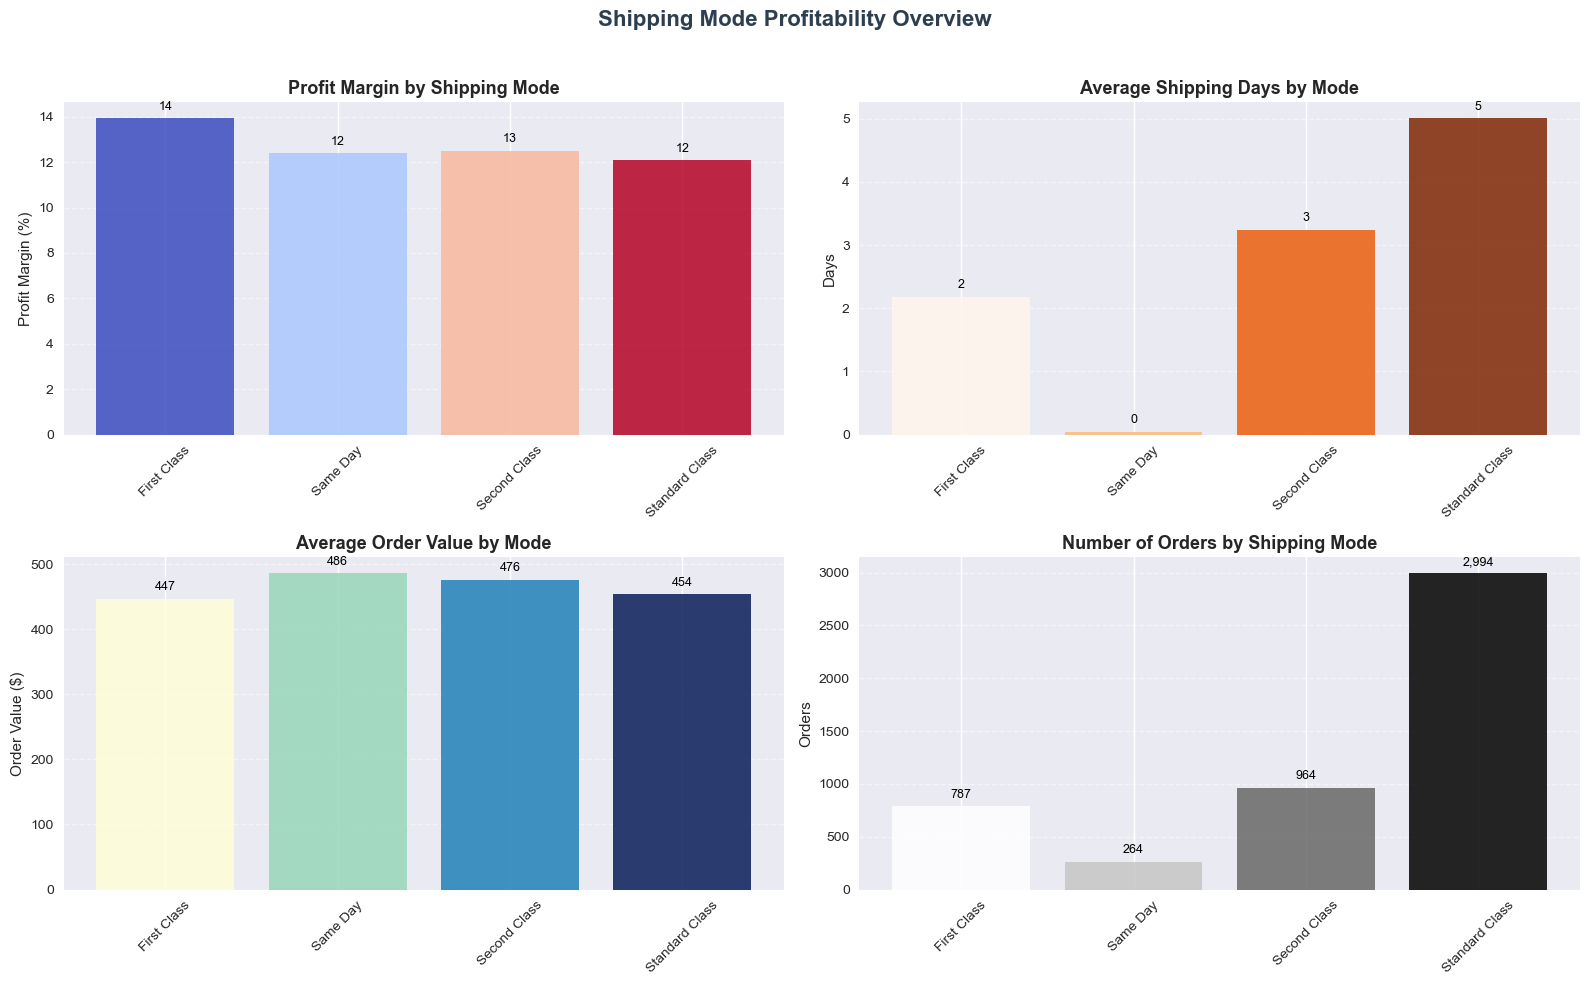

,ship_mode,sales,profit,order_id,shipping_days,quantity,profit_margin,avg_order_value
0,First Class,"351,428.42","48,969.84",787,2.18,3.70,13.93,446.54
1,Same Day,"128,363.12","15,891.76",264,0.04,3.61,12.38,486.22
2,Second Class,"459,193.57","57,446.64",964,3.24,3.82,12.51,476.34
3,Standard Class,"1,358,215.74","164,088.79","2,994",5.01,3.82,12.08,453.65


In [28]:
#  Aggregate performance metrics by shipping mode
shipping_profitability = (
    df.groupby('ship_mode')
      .agg({
          'sales': 'sum',
          'profit': 'sum',
          'order_id': 'nunique',
          'shipping_days': 'mean',
          'quantity': 'mean'
      })
      .reset_index()
)

# Derive key performance indicators
shipping_profitability['profit_margin'] = (
    (shipping_profitability['profit'] / shipping_profitability['sales']) * 100
).round(2)
shipping_profitability['avg_order_value'] = (
    shipping_profitability['sales'] / shipping_profitability['order_id']
).round(2)

# Visualize shipping mode performance 
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Shipping Mode Profitability Overview", fontsize=16, fontweight='bold', color='#2c3e50')

# Profit Margin by Shipping Mode
multi_color_bars(
    axes[0, 0],
    shipping_profitability['ship_mode'],
    shipping_profitability['profit_margin'],
    "Profit Margin by Shipping Mode",
    "Profit Margin (%)",
    cmap_name='coolwarm'
)

# Average Shipping Days by Mode
multi_color_bars(
    axes[0, 1],
    shipping_profitability['ship_mode'],
    shipping_profitability['shipping_days'],
    "Average Shipping Days by Mode",
    "Days",
    cmap_name='Oranges'
)

# Average Order Value by Mode
multi_color_bars(
    axes[1, 0],
    shipping_profitability['ship_mode'],
    shipping_profitability['avg_order_value'],
    "Average Order Value by Mode",
    "Order Value ($)",
    cmap_name='YlGnBu'
)

# Total Orders by Shipping Mode
multi_color_bars(
    axes[1, 1],
    shipping_profitability['ship_mode'],
    shipping_profitability['order_id'],
    "Number of Orders by Shipping Mode",
    "Orders",
    cmap_name='Greys'
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Step 4: Display a styled summary table ---
display(
    styled_table(
        shipping_profitability,
        title=" Shipping Mode Profitability Summary",
        cmap='coolwarm'
    )
)



This analysis examines the financial and operational performance of various shipping modes, revealing how each contributes to profitability and customer satisfaction. Standard Class dominates in total sales (₦1.36M) and profit (₦164K), serving as the core revenue driver despite longer delivery times (≈5 days). First Class achieves the highest profit margin (13.93%), balancing speed (≈2 days) and profitability, making it ideal for mid-tier customers. Same Day delivery, while the fastest (≈0.04 days), yields the lowest total profit due to limited orders and higher operational costs, whereas Second Class maintains a steady balance between delivery time and financial return. Overall profit margins (12–14%) indicate optimized pricing and effective cost control, with Standard Class ensuring volume stability and First Class enhancing value perception together forming a strategic dual shipping approach that drives both customer satisfaction and sustainable growth.

# Conclusion and Recommendations

This analysis uncovered key patterns in sales distribution, profitability, and regional performance.
By applying structured data cleaning, exploratory visualization, and statistical reasoning, the dataset was transformed into a source of business intelligence.

**Key Takeaways:**

Proper data preprocessing is crucial for reliable results.

Profitability can vary significantly by product and region.

Discount strategies require optimization to avoid margin erosion.

**Next Steps:**

Develop predictive models for sales forecasting.

Build interactive dashboards with Plotly or Power BI.

Incorporate customer segmentation for targeted marketing.